In [45]:
jupyter nbconvert --to pdf DIP_Ass_2_lab-Copy1.ipynb


SyntaxError: invalid syntax (761897297.py, line 1)

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [28]:
image = cv2.imread('/home/nalin/Downloads/bmp_13.webp') 

### 1) For the given images, Write a code to find brightness, contrast(histogram), range, aspect ratio, (Hue, saturation, value from RGB image), standard deviation, skewness. (Don’t use inbuilt functions for these basics). Understand and compare results

In [29]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [30]:
def calculate_brightness(gray_image):
    total_pixels = gray_image.shape[0] * gray_image.shape[1]
    brightness = np.sum(gray_image) / total_pixels
    return brightness
brightness = calculate_brightness(gray_image)
print("Brightness:",brightness)

Brightness: 110.57725870335626


In [31]:
def calculate_contrast(gray_image, brightness):
    total_pixels = gray_image.shape[0] * gray_image.shape[1]
    contrast = np.sqrt(np.sum((gray_image - brightness) ** 2) / total_pixels)
    return contrast
contrast = calculate_contrast(gray_image,brightness)
print("Contrast:",contrast)

Contrast: 60.68062319645113


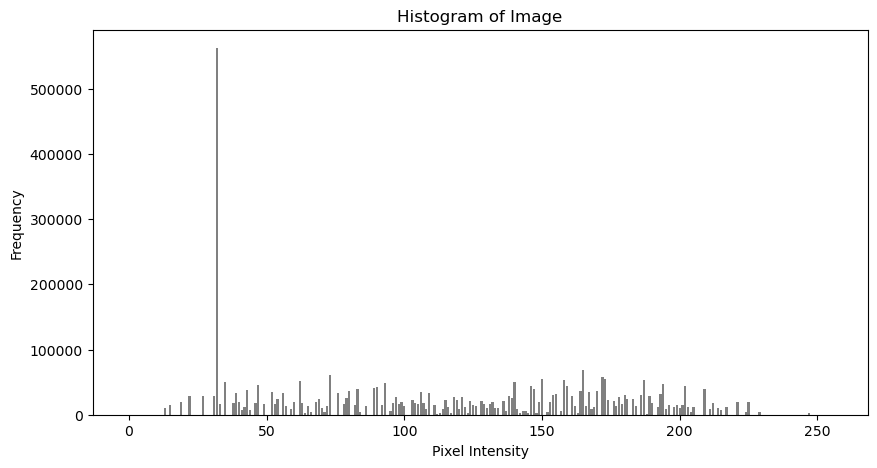

In [32]:
def calculate_histogram(gray_image):
    histogram = [0] * 256
    for pixel in gray_image.flatten():
        histogram[pixel] += 1
    return histogram
histogram = calculate_histogram(gray_image)
plt.figure(figsize=(10, 5))
plt.bar(range(256), histogram, color='gray')
plt.title('Histogram of Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


In [33]:
def calculate_range(gray_image):
    return np.max(gray_image) - np.min(gray_image)
range_ = calculate_range(gray_image)
print("Range:",range_)

Range: 234


In [34]:
def calculate_aspect_ratio(image):
    height, width = image.shape[:2]
    return width / height
aspect_ratio = calculate_aspect_ratio(image)
print("Aspect_Ratio",aspect_ratio)

Aspect_Ratio 1.5009380863039399


In [35]:
def rgb_to_hsv(image):
    image = image.astype('float') / 255.0
    hsv_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            r, g, b = image[i, j]
            max_val = max(r, g, b)
            min_val = min(r, g, b)
            delta = max_val - min_val
            
            # Hue calculation
            if delta == 0:
                h = 0
            elif max_val == r:
                h = (60 * ((g - b) / delta) + 360) % 360
            elif max_val == g:
                h = (60 * ((b - r) / delta) + 120) % 360
            elif max_val == b:
                h = (60 * ((r - g) / delta) + 240) % 360
            
            # Saturation calculation
            s = 0 if max_val == 0 else delta / max_val
            
            # Value calculation
            v = max_val
            
            hsv_image[i, j] = [h, s, v]
    
    return hsv_image
hsv_image = rgb_to_hsv(image)
print("rbg",hsv_image)

rbg [[[23.63636364  0.31730769  0.81568627]
  [23.63636364  0.31730769  0.81568627]
  [23.63636364  0.31730769  0.81568627]
  ...
  [23.63636364  0.31730769  0.81568627]
  [23.63636364  0.31730769  0.81568627]
  [23.63636364  0.31730769  0.81568627]]

 [[23.63636364  0.31730769  0.81568627]
  [23.63636364  0.31730769  0.81568627]
  [23.63636364  0.31730769  0.81568627]
  ...
  [23.63636364  0.31730769  0.81568627]
  [23.63636364  0.31730769  0.81568627]
  [23.63636364  0.31730769  0.81568627]]

 [[23.63636364  0.31730769  0.81568627]
  [23.63636364  0.31730769  0.81568627]
  [23.63636364  0.31730769  0.81568627]
  ...
  [23.63636364  0.31730769  0.81568627]
  [23.63636364  0.31730769  0.81568627]
  [23.63636364  0.31730769  0.81568627]]

 ...

 [[42.16216216  0.98666667  0.58823529]
  [42.16216216  0.98666667  0.58823529]
  [42.16216216  0.98666667  0.58823529]
  ...
  [48.35820896  0.95714286  0.2745098 ]
  [48.35820896  0.95714286  0.2745098 ]
  [48.35820896  0.95714286  0.2745098 ]]

In [36]:
def calculate_standard_deviation(gray_image, brightness):
    total_pixels = gray_image.shape[0] * gray_image.shape[1]
    variance = np.sum((gray_image - brightness) ** 2) / total_pixels
    return np.sqrt(variance)
std_dev = calculate_standard_deviation(gray_image, brightness)
print("std_dev",std_dev)

std_dev 60.68062319645113


In [37]:
def calculate_skewness(gray_image, brightness, std_dev):
    total_pixels = gray_image.shape[0] * gray_image.shape[1]
    skewness = np.sum(((gray_image - brightness) / std_dev) ** 3) / total_pixels
    return skewness
skewness = calculate_skewness(gray_image, brightness, std_dev)
print("skewness",skewness)

skewness 0.05668348867877543


### 2) For a given image, apply two smoothing filters (average and gaussian), edge filter(sobel filter in both directions), laplacian filter. Understand math behind them, Apply above kernels on the given image by using convolution.

In [25]:
image = cv2.imread('/home/nalin/Downloads/bmp_13.webp', cv2.IMREAD_GRAYSCALE) 

def apply_convolution(image, kernel, padding=0):
   
    kernel = np.flipud(np.fliplr(kernel))
    
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape
    
    if padding > 0:
        padded_image = np.zeros((image_h + 2 * padding, image_w + 2 * padding))
        padded_image[padding:image_h + padding, padding:image_w + padding] = image
    else:
        padded_image = image
    
    output = np.zeros_like(image)
    
    for i in range(image_h):
        for j in range(image_w):
            region = padded_image[i:i + kernel_h, j:j + kernel_w]
            output[i, j] = np.sum(region * kernel)
    
    return output

average_kernel = np.ones((3, 3)) / 9  
smoothed_image_average = apply_convolution(image, average_kernel, padding=1)


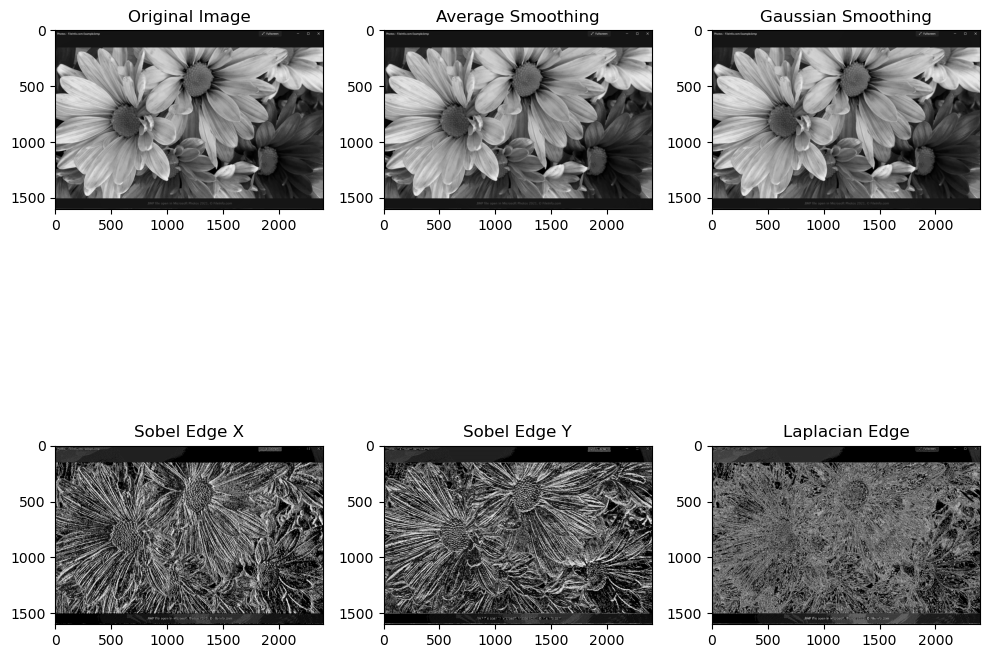

In [26]:
def create_gaussian_kernel(size, sigma):
    
    kernel = np.zeros((size, size))
    center = size // 2
    s = 2 * (sigma ** 2)
    
    for x in range(-center, center + 1):
        for y in range(-center, center + 1):
            kernel[x + center, y + center] = np.exp(-(x**2 + y**2) / s)
    
    return kernel / np.sum(kernel)

gaussian_kernel = create_gaussian_kernel(3, 1)  
smoothed_image_gaussian = apply_convolution(image, gaussian_kernel, padding=1)

sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

edge_image_sobel_x = apply_convolution(image, sobel_x_kernel, padding=1)
edge_image_sobel_y = apply_convolution(image, sobel_y_kernel, padding=1)

edge_image_sobel = np.sqrt(edge_image_sobel_x**2 + edge_image_sobel_y**2).astype(np.uint8)

laplacian_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
edge_image_laplacian = apply_convolution(image, laplacian_kernel, padding=1)

plt.figure(figsize=(10, 10))

plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(232), plt.imshow(smoothed_image_average, cmap='gray'), plt.title('Average Smoothing')
plt.subplot(233), plt.imshow(smoothed_image_gaussian, cmap='gray'), plt.title('Gaussian Smoothing')
plt.subplot(234), plt.imshow(edge_image_sobel_x, cmap='gray'), plt.title('Sobel Edge X')
plt.subplot(235), plt.imshow(edge_image_sobel_y, cmap='gray'), plt.title('Sobel Edge Y')
plt.subplot(236), plt.imshow(edge_image_laplacian, cmap='gray'), plt.title('Laplacian Edge')

plt.tight_layout()
plt.show()


### 3) Create three images of size(256,256) which are red, blue, green which is a combination of (0,0,255). Now write a function which takes weights (a,b,c) as tuple and inputs are your primary color numbers and plot them.

In [38]:
def create_primary_color_images(size=256):
    red_image = np.zeros((size, size, 3), dtype=np.uint8)
    green_image = np.zeros((size, size, 3), dtype=np.uint8)
    blue_image = np.zeros((size, size, 3), dtype=np.uint8)
    
    red_image[:, :, 0] = 255  # Red channel
    green_image[:, :, 1] = 255  # Green channel
    blue_image[:, :, 2] = 255  # Blue channel
    
    return red_image, green_image, blue_image

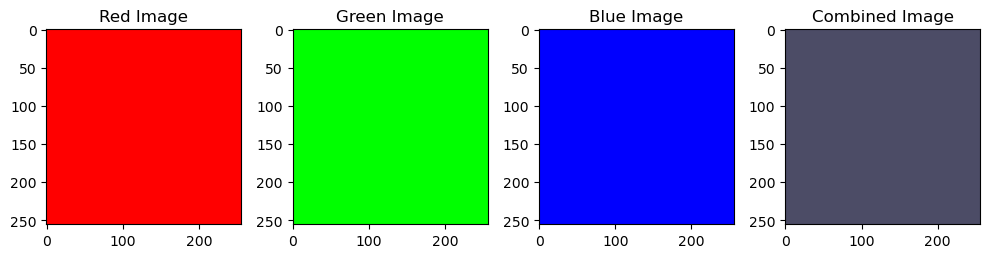

In [39]:
def combine_colors(red_image, green_image, blue_image, weights):
    a, b, c = weights
    
    total = a + b + c
    a, b, c = a / total, b / total, c / total
    
    combined_image = (a * red_image + b * green_image + c * blue_image).astype(np.uint8)
    
    return combined_image

red_image, green_image, blue_image = create_primary_color_images()

weights = (0.3, 0.3, 0.4)  

combined_image = combine_colors(red_image, green_image, blue_image, weights)

plt.figure(figsize=(10, 5))

plt.subplot(141), plt.imshow(red_image), plt.title('Red Image')
plt.subplot(142), plt.imshow(green_image), plt.title('Green Image')
plt.subplot(143), plt.imshow(blue_image), plt.title('Blue Image')
plt.subplot(144), plt.imshow(combined_image), plt.title('Combined Image')

plt.tight_layout()
plt.show()